In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Work/Sem 8/FYP/Dermnet/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5236 files belonging to 4 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Work/Sem 8/FYP/Dermnet/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3217 files belonging to 4 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
164/164 [==============================] - 327s 2s/step - loss: 0.7846 - accuracy: 0.6788 - val_loss: 0.4099 - val_accuracy: 0.8586
Epoch 2/10
164/164 [==============================] - 317s 2s/step - loss: 0.5059 - accuracy: 0.8086 - val_loss: 0.3758 - val_accuracy: 0.8542
Epoch 3/10
164/164 [==============================] - 323s 2s/step - loss: 0.4041 - accuracy: 0.8449 - val_loss: 0.4358 - val_accuracy: 0.8269
Epoch 4/10
164/164 [==============================] - 317s 2s/step - loss: 0.3469 - accuracy: 0.8724 - val_loss: 0.3335 - val_accuracy: 0.8809
Epoch 5/10
164/164 [==============================] - 323s 2s/step - loss: 0.2970 - accuracy: 0.8908 - val_loss: 0.2866 - val_accuracy: 0.8974
Epoch 6/10
164/164 [==============================] - 316s 2s/step - loss: 0.2762 - accuracy: 0.8963 - val_loss: 0.2167 - val_accuracy: 0.9297
Epoch 7/10
164/164 [==============================] - 317s 2s/step - loss: 0.2300 - accuracy: 0.9181 - val_loss: 0.2290 - val_accuracy: 0.9220

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

164/164 [==============================] - 66s 401ms/step - loss: 0.1262 - accuracy: 0.9530
Training accuracy: 0.9530175924301147


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

101/101 [==============================] - 41s 400ms/step - loss: 0.1809 - accuracy: 0.9431
Validation accuracy: 0.943114697933197


In [20]:
# save model
cnn.save('cnn_skin_disease_model.keras')

In [21]:
# serialize weights to HDF5
cnn.save("cnn_skin_disease_model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
training_history.history #Return Dictionary of history

{'loss': [0.7845708131790161,
  0.5059127807617188,
  0.40412119030952454,
  0.34686627984046936,
  0.29699793457984924,
  0.2762053310871124,
  0.23000755906105042,
  0.20573072135448456,
  0.17440009117126465,
  0.174129918217659],
 'accuracy': [0.6787624359130859,
  0.8086325526237488,
  0.8449198007583618,
  0.8724216818809509,
  0.8907563090324402,
  0.896294891834259,
  0.918067216873169,
  0.924369752407074,
  0.9343010187149048,
  0.9375477433204651],
 'val_loss': [0.4099324941635132,
  0.3757909834384918,
  0.4357525408267975,
  0.33352673053741455,
  0.28657713532447815,
  0.21666167676448822,
  0.22895893454551697,
  0.1961391717195511,
  0.17376936972141266,
  0.18092423677444458],
 'val_accuracy': [0.8585638999938965,
  0.8542119860649109,
  0.826857328414917,
  0.8809449672698975,
  0.8974199295043945,
  0.9297482371330261,
  0.9219769835472107,
  0.9334784150123596,
  0.9400061964988708,
  0.943114697933197]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


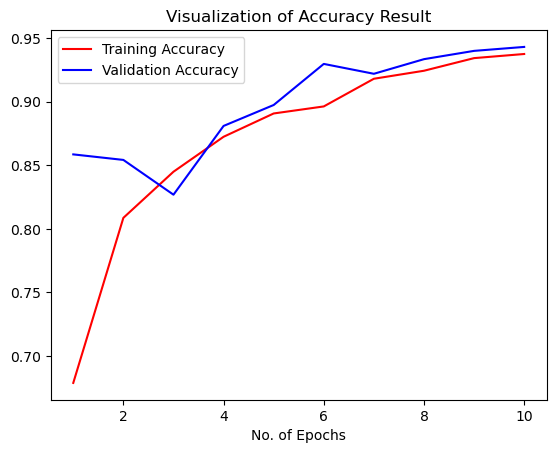

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'D:/Work/Sem 8/FYP/Dermnet/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3217 files belonging to 4 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

3217/3217 [==============================] - 63s 20ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(3217,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [31]:
predicted_categories

<tf.Tensor: shape=(3217,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

        Acne       0.96      0.94      0.95      1728
      Eczema       0.83      0.68      0.75       204
    Melanoma       0.94      0.98      0.96      1226
      Normal       0.87      0.98      0.92        59

    accuracy                           0.94      3217
   macro avg       0.90      0.90      0.90      3217
weighted avg       0.94      0.94      0.94      3217



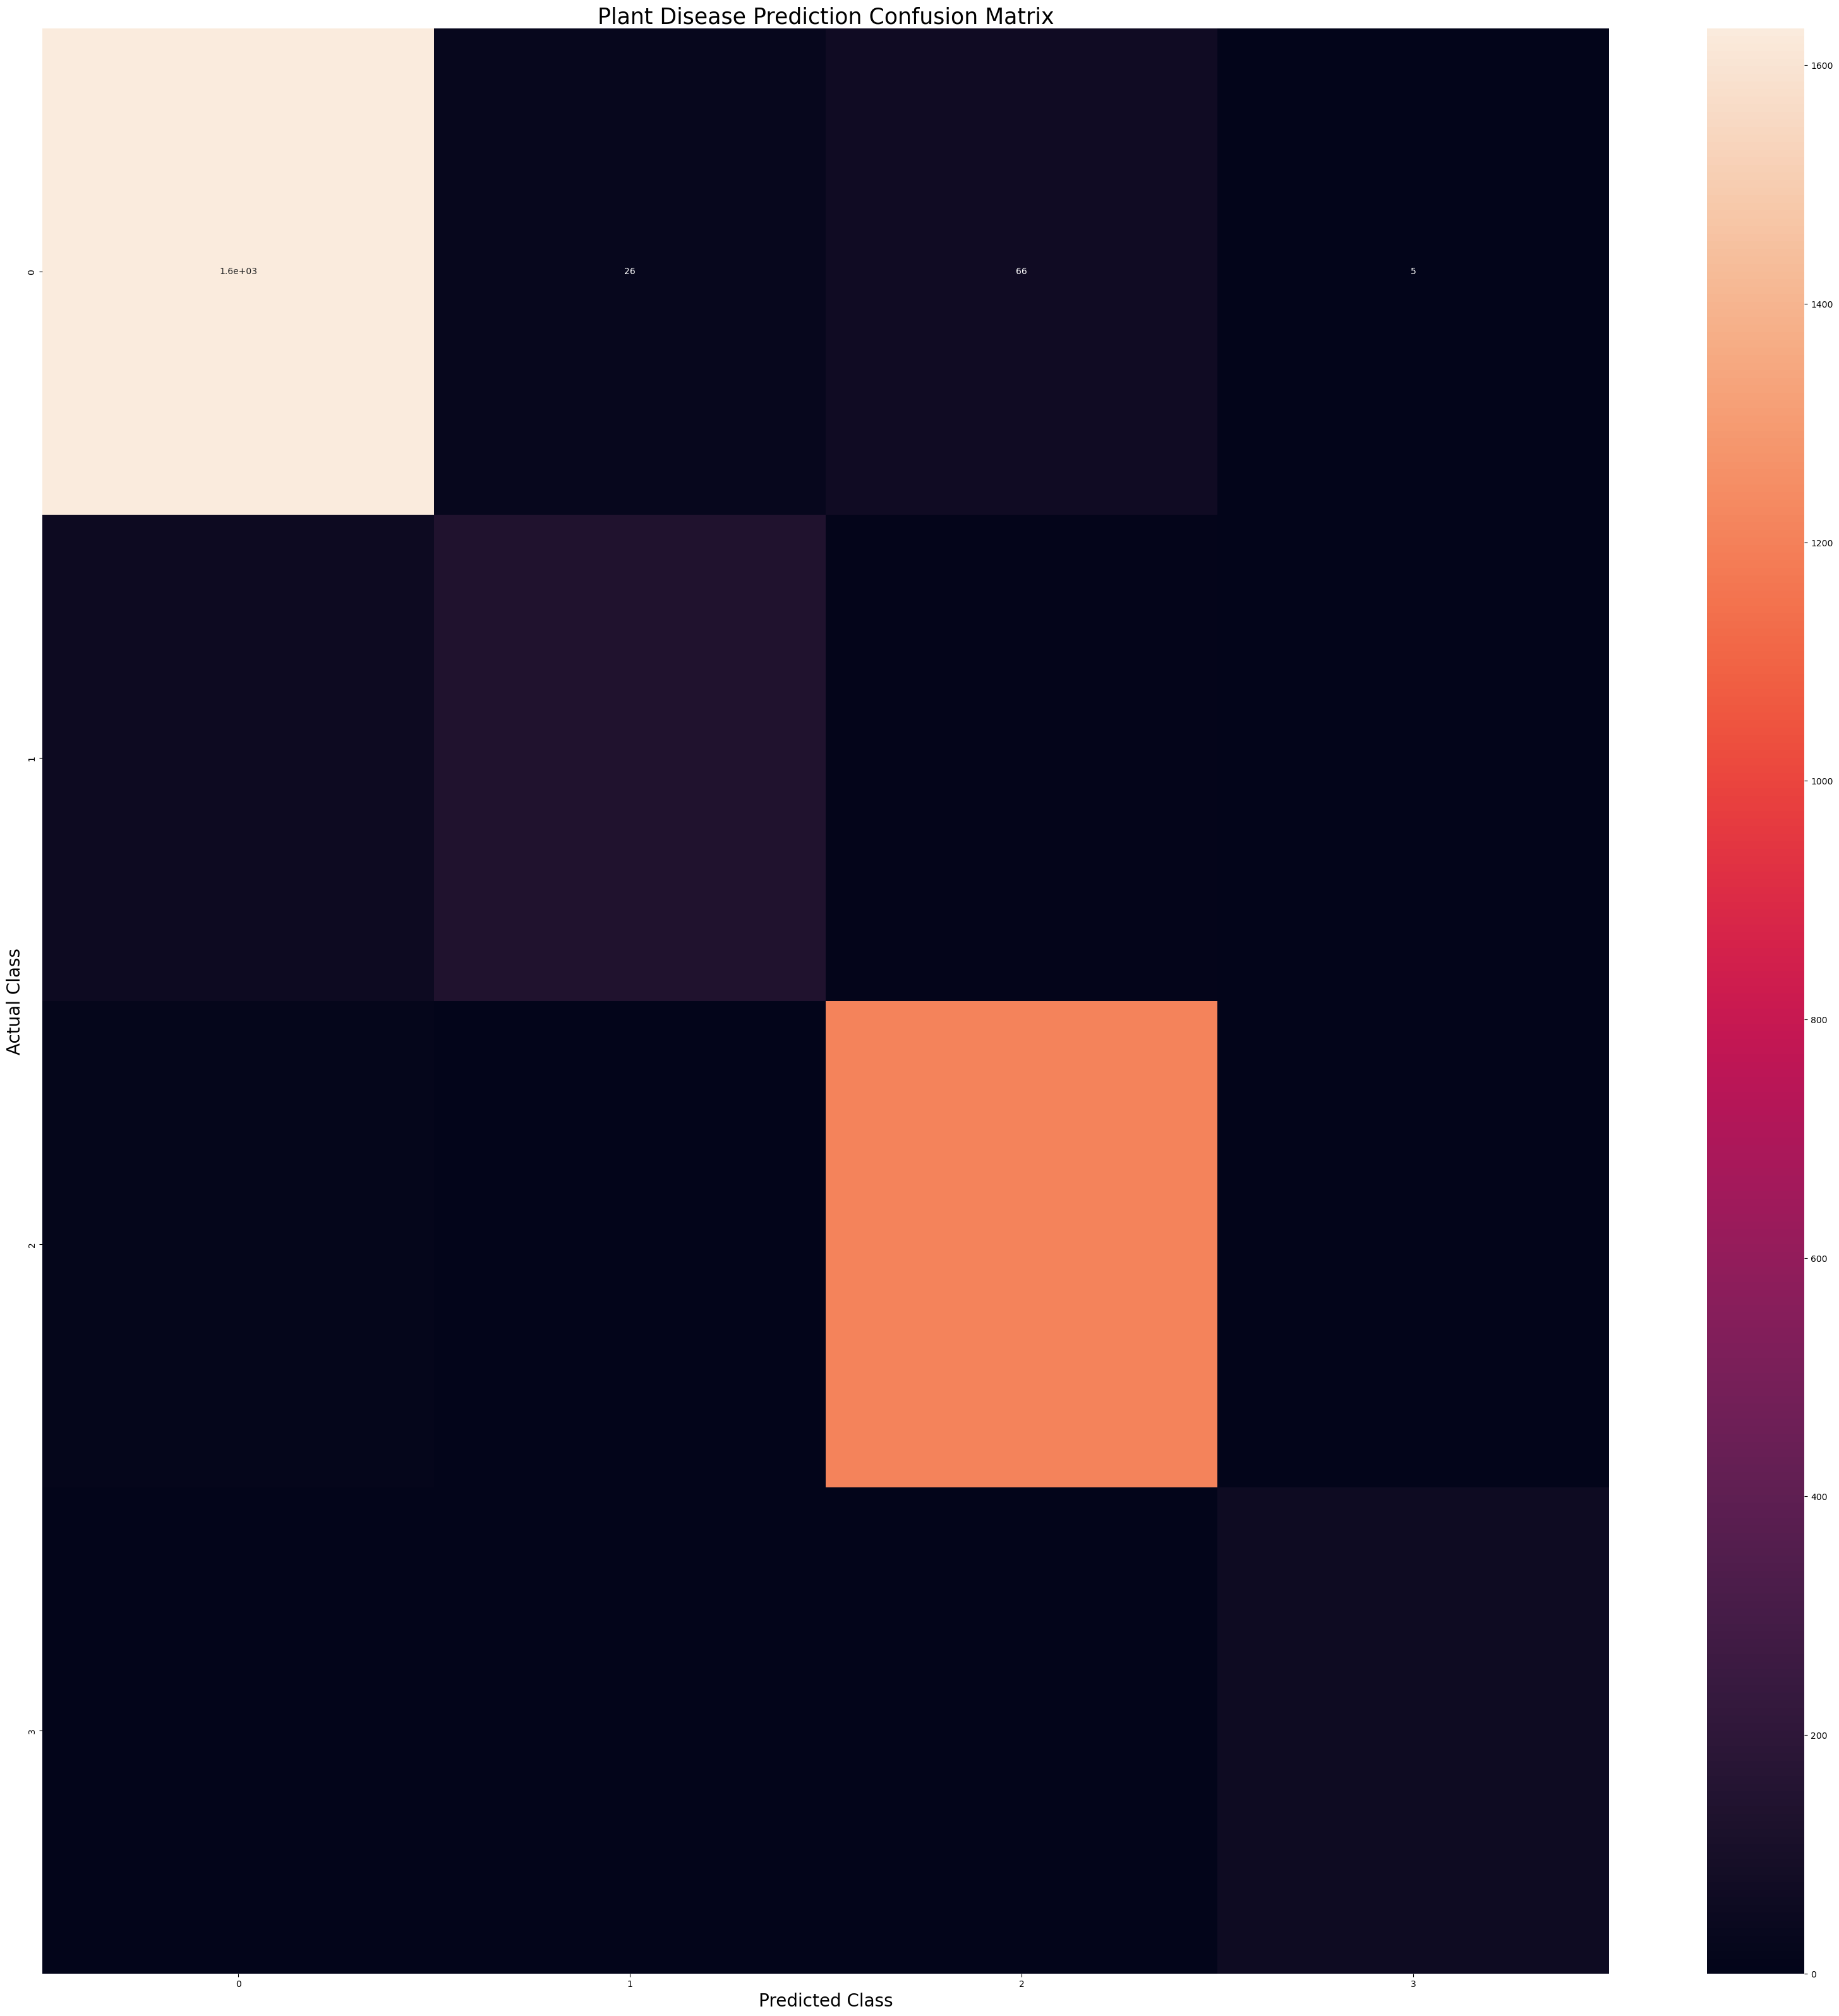

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Skin Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()